In [20]:
import os
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
comp_dataset = 'cnn_delta_full_pinj/'

In [25]:
orig_file = 'train_dis.pkl'
comp_X_file = os.path.join(comp_dataset, 'train_X.npy')
comp_y_file = os.path.join(comp_dataset, 'train_y.npy')

In [53]:
SIGNAL_LIST = ['R0', 'aminor', 'dssdenest', 'efsbetan', 'efsli', 
               'efsvolume', 'ip', 'kappa', 'tribot', 'tritop', 
               'pinj']
action_idx = SIGNAL_LIST.index('pinj')
target_idx = SIGNAL_LIST.index('efsbetan')

In [8]:
orig_data = pkl.load(open(orig_file, 'rb'), encoding='latin1')
comp_X = np.load(comp_X_file)
comp_y = np.load(comp_y_file)

In [9]:
comp_X.shape, comp_y.shape

((156664, 12, 100), (156664, 1))

In [34]:
orig_data1 = orig_data[164538]
comp_X1 = comp_X[0]
comp_y1 = comp_y[0]

In [27]:
orig_data1[0].shape, orig_data1[1].shape

((1991,), (11, 1991))

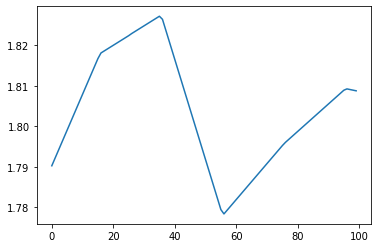

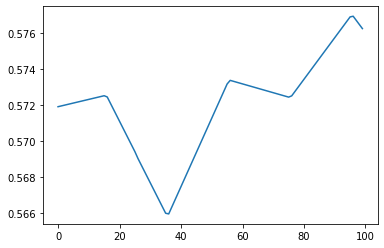

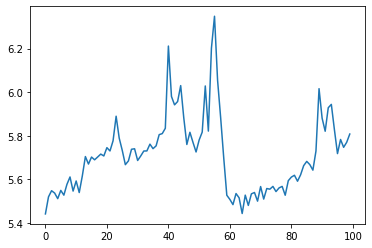

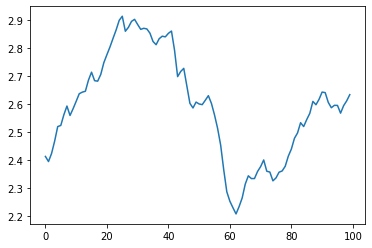

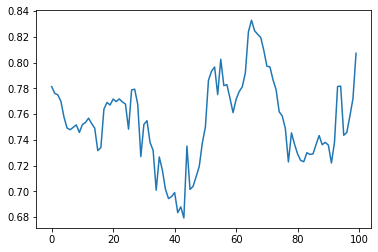

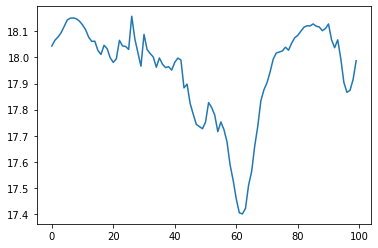

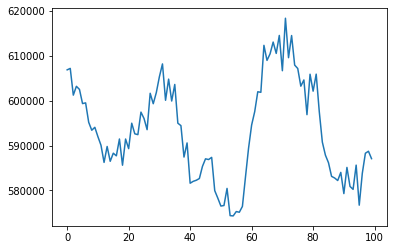

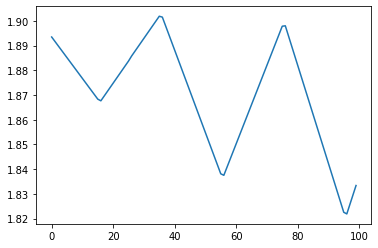

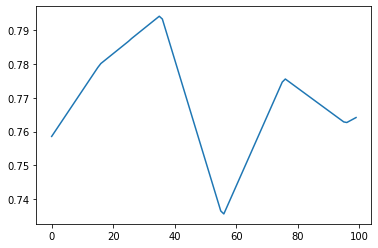

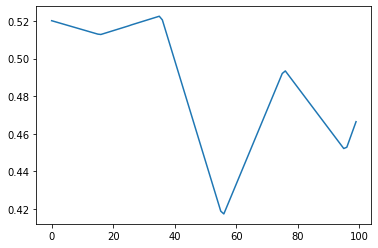

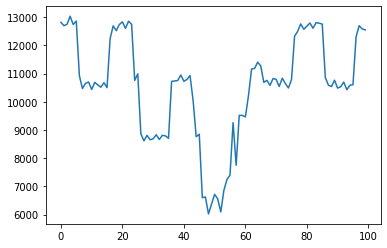

In [33]:
for signal in orig_data1[1]:
    plt.plot(signal[:100])
    plt.show()

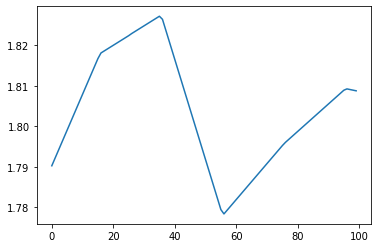

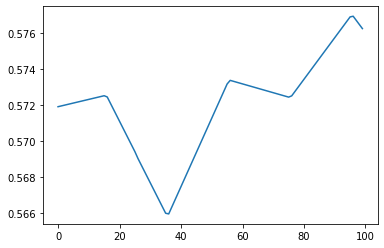

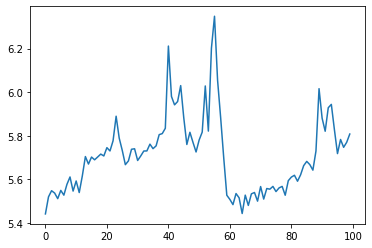

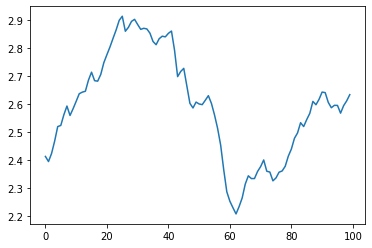

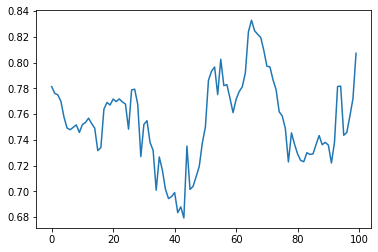

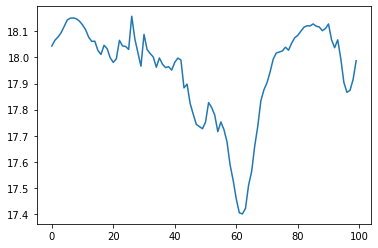

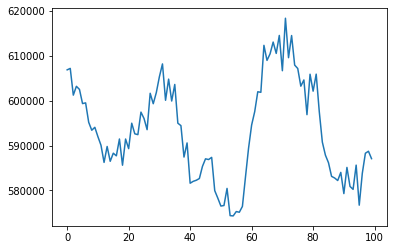

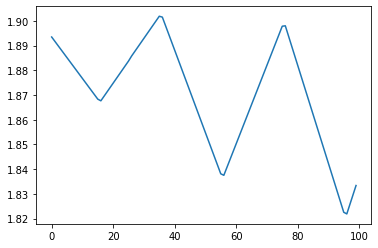

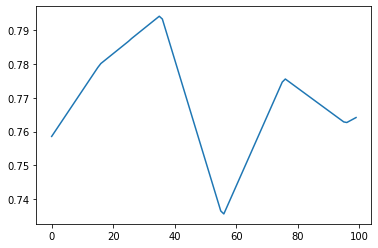

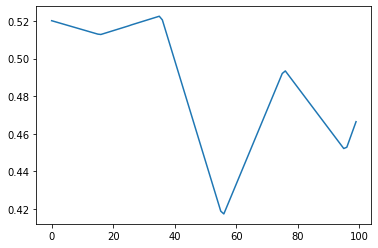

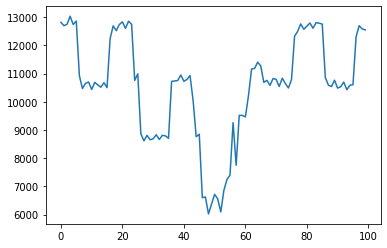

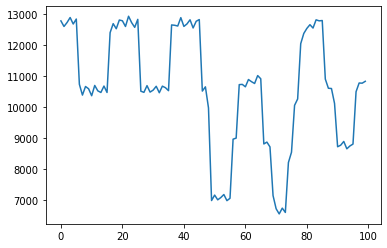

In [35]:
for signal in comp_X1:
    plt.plot(signal)
    plt.show()

In [37]:
orig_data1[1].shape, comp_X1.shape

((11, 1991), (12, 100))

In [52]:
np.sum(comp_X1[:-1, :] - orig_data1[1][:,:100])

0.0

In [51]:
comp_X1[-1,:] - orig_data1[1][action_idx,100:200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
plt.plot(targ)

In [69]:
comp_y1 - (orig_data1[1][target_idx,200] - orig_data1[1][target_idx,99])

array([0.])

In [70]:
comp_X.shape

(156664, 12, 100)

In [91]:
# t_idx = 0
comp_idx = 0
for k,v in orig_data.items():
    t_idx = 0
    while True:
        try:
            state_diff = v[1][:,t_idx:t_idx+100] - comp_X[comp_idx,:-1,:]
            action_diff = v[1][action_idx, t_idx+100:t_idx+200] - comp_X[comp_idx,-1,:]
            target_diff = (v[1][target_idx, t_idx+200] - v[1][target_idx, t_idx+99]) - comp_y[comp_idx]
#             print(state_diff, action_diff, target_diff)
            assert((state_diff==0.0).all())
            assert((action_diff==0.0).all())
            assert((target_diff==0.0).all())
        except:
            import pdb; pdb.set_trace()
            
        t_idx += 10
        comp_idx += 1
        
        if t_idx+200 > v[1].shape[1]:
            break
    

> <ipython-input-91-f2e0f4a6759f>(17)<module>()
-> t_idx += 10
(Pdb) comp_idx
10147
(Pdb) state_diff
array([[-2.97111313e-02, -2.81775114e-02, -2.66438916e-02, ...,
        -3.43990494e-02, -3.52794156e-02, -3.61597819e-02],
       [ 5.81547150e-02,  5.79950300e-02,  5.78353449e-02, ...,
         3.06613561e-02,  3.02027077e-02,  2.97440594e-02],
       [-2.25520281e+00, -2.22955372e+00, -2.18403902e+00, ...,
        -2.19893913e+00, -2.04685183e+00, -2.24600778e+00],
       ...,
       [-2.33425903e-01, -2.31574829e-01, -2.29723756e-01, ...,
        -2.20040486e-01, -2.20300828e-01, -2.20561171e-01],
       [ 5.39239376e-02,  5.13019226e-02,  4.86799077e-02, ...,
        -8.09517734e-02, -8.22251169e-02, -8.34984603e-02],
       [-4.41688705e+03, -4.52816376e+03, -3.34506853e+03, ...,
        -5.88139589e+03, -5.89000922e+03, -5.88360315e+03]])
(Pdb) v1.shape
*** NameError: name 'v1' is not defined
(Pdb) k
162289
(Pdb) q


BdbQuit: 

In [93]:
list(orig_data.keys()).index(162289)

58